In [1]:
'''import sys
!{sys.executable} -m pip install aplpy'''

'import sys\n!{sys.executable} -m pip install aplpy'

In [2]:
import numpy as np
from os.path import dirname, join as pjoin

from scipy.misc import derivative
import sys,math
import scipy.io as sio
from scipy.io import readsav

import matplotlib.pyplot as plt 

from PIL import Image as im 

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import copy

In [3]:
font = {'family' : 'Times',
        'size'   : 30}	
plt.rc('font', **font) #set all plot font attributes according to above

<img src="../../../Programming_Play/sphx_glr_colormap_reference_001.webp">

In [4]:
def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

<img src="../../../PSP_diagram_geom.jpeg.png" style="height:50px">

# 1-Parameter Models

## A Family of Curves

H_SW shape:  (20, 4200)   <--- 50 curves, each of [ ] data points equal to num in linspace


<ipython-input-5-f2f263e3c0ce>:23: RuntimeWarning: divide by zero encountered in true_divide
  alt_list.append(np.arctan((h_arr/x))*180./np.pi)


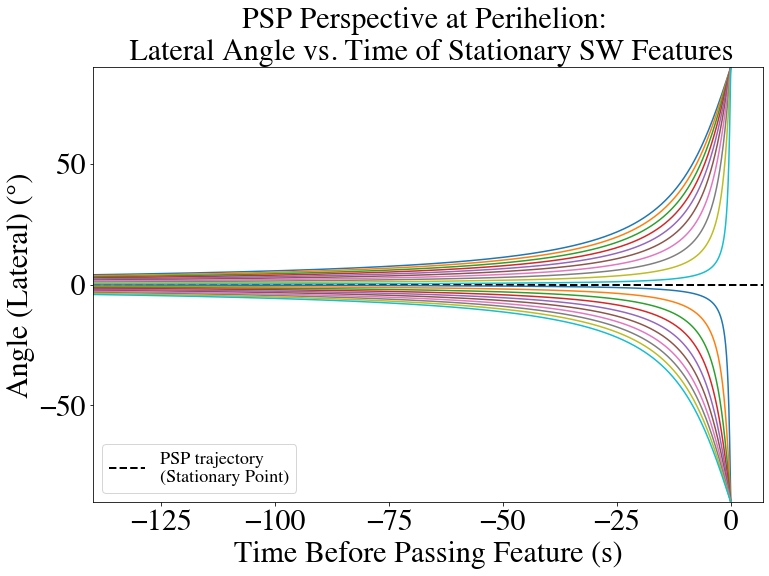

In [5]:
# Analytical Curves, with spacecraft speed set to unity and feature speeds fixed (zero speed)
    
# Number of curves we will examine
n = 20

# "Known" pysical quantities
v_PSP = 1 # km/s 
v_SW = 0 # km/s
x_0 = -140 # km

t_start = 140 # s
time_samples = 4200
H0_range = np.linspace(-10,10,num=n) # km
t = np.linspace(0,t_start,num=time_samples) # s

# Linear kinematic equations for SW features and s/c
H_SW = [H_0 +(v_SW*(t+t_start)) for H_0 in H0_range]
print("H_SW shape: ",(np.array(H_SW)).shape,"  <--- 50 curves, each of [ ] data points equal to num in linspace")
x = x_0 + (v_PSP*(t+t_start)) 
alt_list = []

for h_arr in H_SW:
    alt_list.append(np.arctan((h_arr/x))*180./np.pi)

plt.figure(figsize=(12,8))

for alt in alt_list:
    fig = plt.plot(-t,-alt,linestyle='solid') #,label='Apparent track of SW feature in FOV',color='blue') 

# Plot the results
plt.title("PSP Perspective at Perihelion: \n Lateral Angle vs. Time of Stationary SW Features",fontsize=30)
plt.xlabel("Time Before Passing Feature (s)",fontsize=30)
plt.ylabel("Angle (Lateral) (°)",fontsize=30)

plt.ylim(-90,90)
plt.xlim(-t_start)
plt.hlines(y=0,xmin=-t_start,xmax=10,color='black',linewidth=2,linestyle='--',label="PSP trajectory \n(Stationary Point)")
plt.legend(loc='lower left',fontsize=18)

The above graph shows the altitude of various (stationary) SW features at different distances above and below the PSP (plane of orbit) as seen by the spacecraft. As seen by the s/c, the features fly by with varying perspective changes depending on their starting altitude, even though they are stationary in this model. 

No feature actually collides because no feature starts (and therefore stays) on the plane of orbit (as represented by the horizontal black line at altitude = 0 deg). All features eventually diverge from the plane, but those closest to the plane manifest a very different evolution than those far from the plane; i.e. near features have huge changes in altitude (aka latitude), while those farther away from the s/c present gradual perspective changes.

# Fixed cross-track distance; varying along-track distances --> varying crossing times of features

<ipython-input-6-fe0c249dbf17>:24: RuntimeWarning: divide by zero encountered in true_divide
  alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)
<ipython-input-6-fe0c249dbf17>:24: RuntimeWarning: divide by zero encountered in true_divide
  alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)
<ipython-input-6-fe0c249dbf17>:24: RuntimeWarning: divide by zero encountered in true_divide
  alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)
<ipython-input-6-fe0c249dbf17>:24: RuntimeWarning: divide by zero encountered in true_divide
  alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)
<ipython-input-6-fe0c249dbf17>:24: RuntimeWarning: divide by zero encountered in true_divide
  alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)


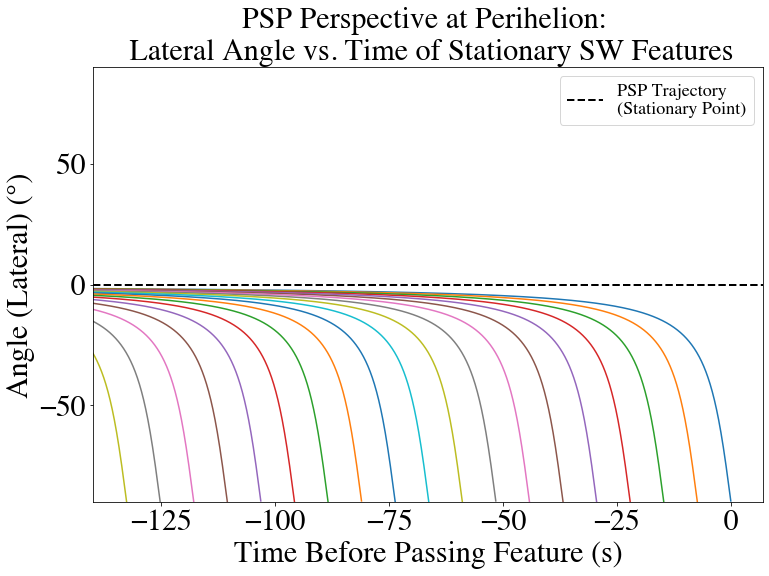

In [6]:
NCurves = 20

# "Known" pysical quantities
v_PSP = 1 # km/s 
v_SW = 0 # km/s
x_0 = -140 # km

t_total = 140 # s
time_samples = 4200

h0 = 4

##
time_array = np.linspace(0,t_total,time_samples)
x_PSP = v_PSP*time_array

h0 = 4
cross_times = np.linspace(0,140,NCurves)
alt_list = np.zeros((len(cross_times),time_samples))

plt.figure(figsize=(12,8))
for curve in range(NCurves):
    cross_time_arr = time_array - cross_times[curve] # v_PSP = 1
    alt_list[curve] = (np.arctan((h0/cross_time_arr))*180./np.pi)
    alt_list_to_plot = alt_list[curve]
    alt_list_to_plot = alt_list_to_plot[time_array > cross_times[curve]]
    plt.plot(-t[time_array > cross_times[curve]],-alt_list_to_plot,linestyle='solid') 
    
    

# Plot the results
plt.title("PSP Perspective at Perihelion: \n Lateral Angle vs. Time of Stationary SW Features",fontsize=30)
plt.xlabel("Time Before Passing Feature (s)",fontsize=30)
plt.ylabel("Angle (Lateral) (°)",fontsize=30)
plt.ylim(-90,90)
plt.xlim(-t_start)
plt.hlines(y=0,xmin=-t_start,xmax=10,color='black',linewidth=2,linestyle='--',label="PSP Trajectory \n(Stationary Point)")
plt.legend(loc='upper right',fontsize=18)




# "Random" Collection of Curves (various cross-track distances and along-track distances)

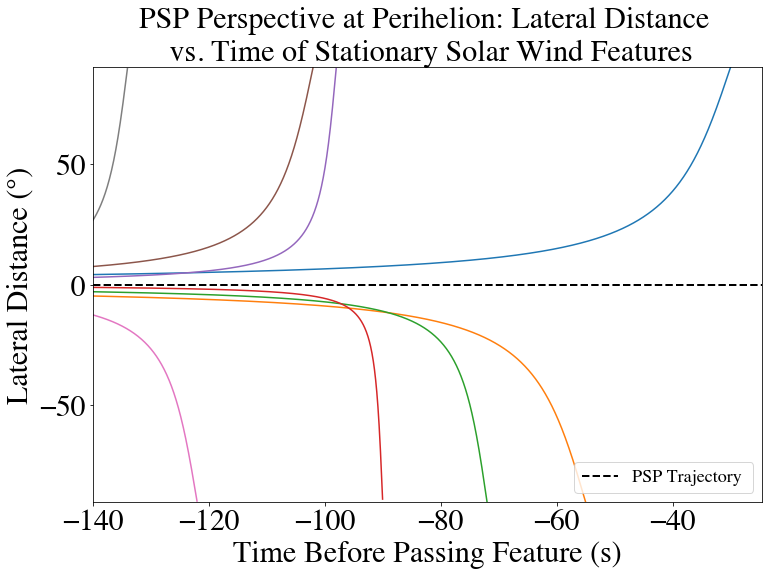

In [7]:


NCurves = 20

# "Known" pysical quantities
v_PSP = 1 # km/s 
v_SW = 0 # km/s
x_0 = -140 # km

t_total = 140 # s
time_samples = 4200

h0 = 4

##
time_array = np.linspace(0,t_total,time_samples)
x_PSP = v_PSP*time_array

cross_times = [30,55,72,90,98,102,122,134,138]
heights = [-8,7,3.5,1,-2.2,-5,4,-3]
alt_list = np.zeros((len(cross_times),time_samples))

plt.figure(figsize=(12,8))
for height in range(len(heights)):
    cross_time_arr = time_array - cross_times[height] # v_PSP = 1
    alt_list[height] = (np.arctan((heights[height]/cross_time_arr))*180./np.pi)
    alt_list_to_plot = alt_list[height]
    alt_list_to_plot = alt_list_to_plot[time_array > cross_times[height]]
    plt.plot(-t[time_array > cross_times[height]],-alt_list_to_plot,linestyle='solid') 
    
    

# Plot the results
plt.title("PSP Perspective at Perihelion: Lateral Distance \n vs. Time of Stationary Solar Wind Features",fontsize=30)
plt.xlabel("Time Before Passing Feature (s)",fontsize=30)
plt.ylabel("Lateral Distance (°)",fontsize=30)
plt.ylim(-90,90)
plt.xlim(-t_start)
plt.hlines(y=0,xmin=-t_start,xmax=10,color='black',linewidth=2,linestyle='--',label="PSP Trajectory ")
plt.legend(loc='lower right',fontsize=18)


# One curve at a time

<class 'numpy.ndarray'> 0.0


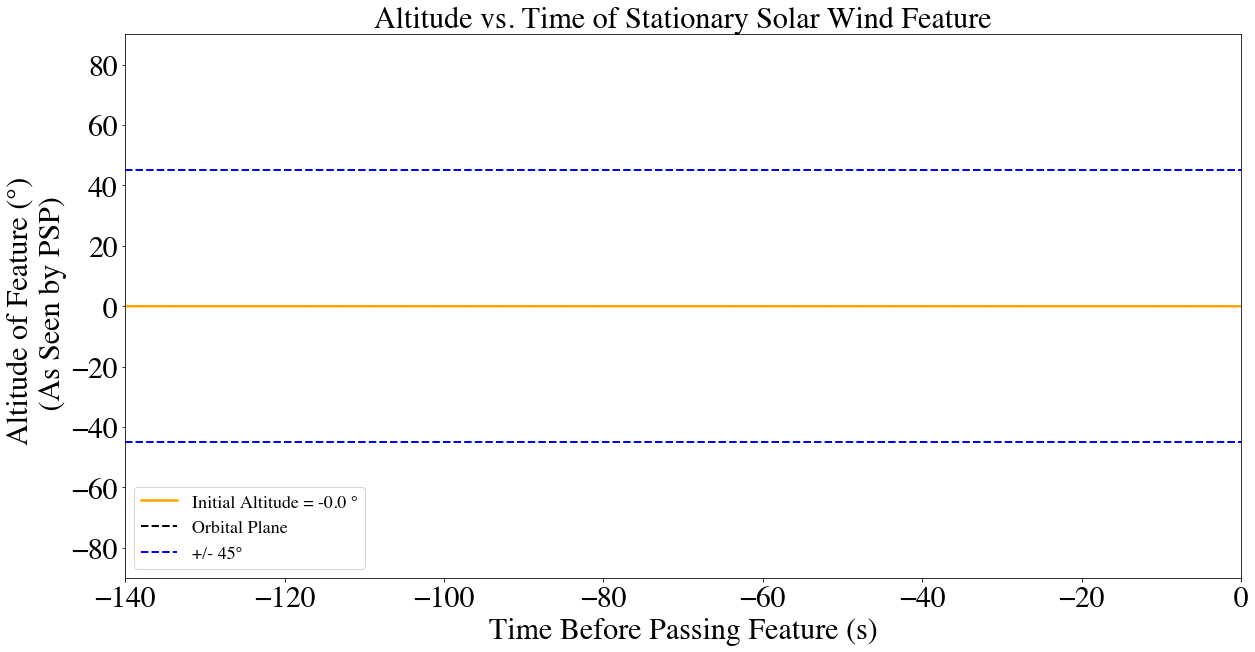

In [8]:
# Let's start with a single curve (of the 50 above)    

index = 8
chosen_curve = alt_list[index]
plt.figure(figsize=(20,10))
print(type(chosen_curve),chosen_curve[-1])
fig2 = plt.plot(-t,-chosen_curve,linestyle='solid',color='orange',linewidth=2.5,label='Initial Altitude = '+str(round(-chosen_curve[-1],2))+ ' °')

'''for timestep in range(140):
    plt.plot(-t-timestep,-chosen_curve,linestyle='solid',color='blue',linewidth=2.5)
    plt.plot(-t-timestep,chosen_curve,linestyle='solid',color='orange',linewidth=2.5)
'''

plt.title("Altitude vs. Time of Stationary Solar Wind Feature",fontsize=30)
plt.xlabel("Time Before Passing Feature (s)",fontsize=30)
plt.ylabel("Altitude of Feature (°) \n (As Seen by PSP)",fontsize=30)
plt.ylim(-90,90)
plt.xlim(-t_start,0)
plt.hlines(y=0,xmin=-t_start,xmax=10,color='black',linestyle='--',linewidth=2,label="Orbital Plane")
plt.hlines(y=45,xmin=-t_start,xmax=10,color='blue',linestyle='--',linewidth=2,label="+/- 45°")
plt.hlines(y=-45,xmin=-t_start,xmax=10,color='blue',linestyle='--',linewidth=2)
plt.legend(loc='lower left',fontsize=18)

# From a line plot to a pixel grid: generating images

<ipython-input-9-5a3173b866ae>:13: RuntimeWarning: invalid value encountered in true_divide
  NormaliseY = chosen_curve / np.max(chosen_curve)


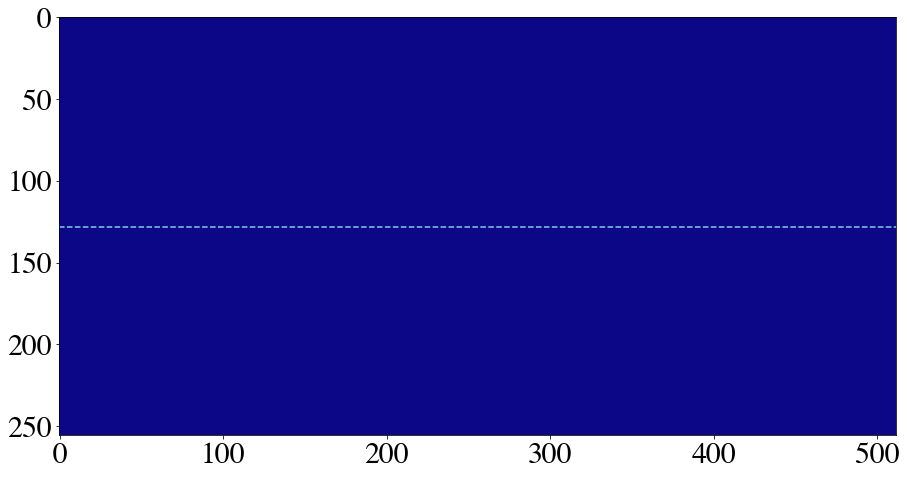

In [9]:



#---Dimensions in height and width of the image (in pixels)
ImageYdim = 256
ImageXdim = 512

#---Y offset for structure
YStrucOffsetParameter = 128

ActualXvalues = t
ActualYvalues = chosen_curve

#---Normalise X and Y values
NormaliseX = t / np.max(t)
NormaliseY = chosen_curve / np.max(chosen_curve)

#---Line Width in pixels - should be an odd number
LineWidth = 10
HalfLineWidth = LineWidth * 0.5


#---Create pixel values (remember to start from 0!)
PixelX = NormaliseX * (ImageXdim)
PixelY = NormaliseY * ((ImageYdim*0.5)) + YStrucOffsetParameter




#---Create a numpy array of 0's (this will be your image)
image_data = np.zeros((ImageYdim, ImageXdim))

#---probably a vectorised way of doing this, rather than looping!

# Put a derivative condition in so that we can 
iStep = 0
for x in (PixelX):
    xpos = PixelX[iStep] #x index - note these are made to integers below
    ypos = PixelY[iStep] #y index - note these are made to integers below
    jStep = 0
    xpos = xpos.astype(np.int)
    ypos = ypos.astype(np.int)
    
    for j in range(LineWidth):
        #p(j - np.floor(LineWidth*0.5))
        #ypos = ypos + j - np.floor(LineWidth*0.5)
        
        yposPlot = ypos + j + int(HalfLineWidth)
        '''if xpos == 0:
            print(yposPlot)
        if xpos == ImageXdim-1:
            print(yposPlot)'''

        if yposPlot < ImageYdim:
            if yposPlot >= 0:
                image_data[yposPlot,-xpos] = 1
        '''if yposPlot + 10 < ImageYdim:
            if yposPlot -10 >= 0:
                image_data[yposPlot + 8, -xpos] = -1
                image_data[yposPlot - 8, -xpos] = -1'''
                
    iStep += 1

figure = plt.figure()
figure.set_size_inches(15, 15)
plt.imshow(image_data, cmap='plasma')
plt.axhline(y=YStrucOffsetParameter,color='skyblue',linestyle='--')


In [10]:
## Matt's code to make an image from an analytic plot
angular_span = 180
#---Dimensions in height and width of the image (in pixels)
ImageYdim = 256 #h
ImageXdim = 512 #w

ActualXvalues = t
ActualYvalues = chosen_curve

#---Normalize X and Y values
NormalizeX = t / np.max(t)
NormalizeY = chosen_curve / np.max(chosen_curve)

#---Create pixel values (remember to start from 0!)
PixelX = NormalizeX * (ImageXdim-1)
PixelY = (NormalizeY * (ImageYdim/2. -1) ) + ImageYdim /2.


#---Create a numpy array of 0s (framework for image)
image_data = np.zeros((ImageYdim, ImageXdim))

#---probably a vectorized way of doing this, rather than looping!
iStep = 0
for x in PixelX:
    xpos = PixelX[iStep] #x index - note these are made to integers below
    ypos = PixelY[iStep] #y index - note these are made to integers below
    image_data[-ypos.astype(np.int),-xpos.astype(np.int)] = 1
    iStep += 1
            
#---Create Figure
name = f"Altitude_v-time_index={index}_imagecurve.png"
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])
#axes.set_axis_off()
figure.add_axes(axes)

figure.set_size_inches(8, 8)
plt.xlabel("Time (timesteps)")
plt.ylabel("Altitude ($\degree$)")
plt.imshow(image_data, cmap='plasma',axes=axes, origin='lower',extent=[0,max(t),-angular_span/2.,angular_span/2.])

axes.set_xlim(0,140)
plt.savefig(name, format='png')

print(type(image_data))

<ipython-input-10-24772ccbf4a6>:12: RuntimeWarning: invalid value encountered in true_divide
  NormalizeY = chosen_curve / np.max(chosen_curve)


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 256

# Two-parameter image curves

## starting height, crossing time, linewidth

In [547]:
def imgcurves_2d(start_height, cross_time, LineWidth):
    '''Generate a 2-dimensional basis function in image space to cross-correlate with the J-Map curves'''
    
    
    ###---Dimensions in height and width of the image (in pixels)
    ImageYdim = 256 #h
    ImageXdim = 140 #w
    
    HalfLineWidth = LineWidth * 0.5
    YStrucOffsetParameter = 128
    t_total = 140
    
    
    h0 = start_height
    total_timesteps = 5000
        
    time_array = np.linspace(0,t_total,total_timesteps)
    x_PSP = v_PSP*time_array
    x0 = time_array - cross_time # v_PSP = 1
    h0 = start_height

    ### Compute the altitude/angle with the arctangent function (Do I need to use np.arctan2()???)
    altitude = (np.arctan((h0/(x0))))*180./np.pi

    
    ## Discern flat section of curve from steep section
    count_deriv = 0
    deriv_index = []
    
    for timestep in range(len(time_array)):
        #print(timestep)
        dydt = (altitude[timestep+1] - altitude[timestep])/(time_array[timestep+1] - time_array[timestep])
        if np.abs(dydt) > 0.2:
            deriv_index.append(timestep)
            count_deriv += 1
        if count_deriv == 1:
            break
    deriv_index = deriv_index[0]
    
    ## Determine where the crossing time occurs so that we can cut off the array at that value
    count = 0
    stop_index = []
    
    for timestep in range(len(time_array)):
        
        if time_array[timestep] > cross_time:
            stop_index.append(timestep)
            count += 1
        if count == 1:
            break
    
    stop_index = stop_index[0]
    #print("stopping index: ",stop_index)


    ActualXvalues = time_array
    ActualYvalues = altitude

    ###---Normalize X and Y values
    
    NormalizeX = time_array / np.max(time_array)
    NormalizeY = altitude / np.max(altitude)


    ###---Create pixel values (remember to start from 0!)
    PixelX = NormalizeX * (ImageXdim-1)
    PixelY = (NormalizeY * (0.5*ImageYdim -1) ) + YStrucOffsetParameter

    ###---Create a numpy array of 0s (framework for image)
    image_data_2d = np.full((ImageYdim, ImageXdim),0)

    ###---probably a vectorized way of doing this, rather than looping!
    iStep = 0
    xindices = []
    yindices = []
    
    
    #curve_central_data_points = np.zeros([ImageYdim,2])
    

    ### Draw the basic curve
    for x in PixelX:
        
        if iStep < (stop_index):
            xpos = PixelX[iStep] #x index - note these are made to integers below
            ypos = PixelY[iStep] #y index - note these are made to integers below
            jStep = 0
            xpos = xpos.astype(np.int)
            ypos = ypos.astype(np.int)
            
            
            for j in range(-LineWidth, LineWidth+1):
                
                yposPlot = ypos + j - int(HalfLineWidth)
                #yposPlotThin = ypos + round(j/2) - int(HalfLineWidth)
                
                xposPlot = xpos + j - int(HalfLineWidth)
                #xposPlotThin = xpos + round(j/2) - int(HalfLineWidth)
                
                
                ### The curve itself
                if yposPlot < ImageYdim and yposPlot >= 0 and xposPlot < ImageXdim and xposPlot >= 0: 
                    image_data_2d[(yposPlot),xposPlot] = 1
                    
                '''if yposPlot < ImageYdim and yposPlot >= 0: 
                    image_data_2d[(yposPlot),xpos] = 1
                    
                if xposPlot < ImageXdim and xposPlot >= 0: 
                    image_data_2d[(ypos),xposPlot] = 1'''
                
            
            
            iStep += 1
            
    diff_array = np.zeros([stop_index,2])
    
    # We want the width of the line/curve to be constant, but for large derivatives the y points get so spaced
    # out that the pre-determined line width doesn't connect the adjacent points. Solution: put a condition on 
    # the line width that hinges on distance between y points
    
    min_LineWidth = LineWidth 
    
    for pstep in range(stop_index-1):
#         diff_array[pstep,0] = PixelX[pstep+1] - PixelX[pstep]
#         diff_array[pstep,1] = PixelY[pstep+1] - PixelY[pstep]
        #derivative[pstep + 1] = diff_array[pstep,1] / diff_array[pstep,0]
        #print(image_data_2d[np.abs(derivative[pstep+1]) >= 10]) 
        
        # Fill in pixels above and below current pixel in a way that is sensitive to inter-point distances
        # i.e. line width varies to create continuous curve free of jaggies
        for j in range(-min_LineWidth, min_LineWidth+1):
            
            # First, compute the distance between the current y pixel and the former y pixel:
            y_val_diff = PixelY[pstep] - PixelY[pstep - 1]
            
            yposPlot = int(PixelY[pstep]) + j - int(HalfLineWidth) 
            
            
            # if the distance b/w adjacent y pixels > minimum linewidth, make the linewidth = ypixel distance:
            if np.abs(y_val_diff) > min_LineWidth:
                y_LineWidth = int(y_val_diff)
            else: 
                y_LineWidth = min_LineWidth
            
            # for each y point, create width in the x direction for all points above and below the current y 
            # pixel that abides by the necessary "width" in the y direction:

            for k in range(-y_LineWidth, y_LineWidth+1): 
                if k > j:
                    xposPlot == int(PixelX[pstep]) + k - int(HalfLineWidth) 
                else:
                    xposPlot = int(PixelX[pstep]) + k - int(HalfLineWidth) 
#                 xposPlot = int(PixelX[pstep]) + k - int(HalfLineWidth) 

                # to make sure we stay inside the image:
                
                if yposPlot < ImageYdim and yposPlot > 0 and xposPlot < ImageXdim and xposPlot >= 0:
                    if ( yposPlot - (yposPlot -1)) / (xposPlot - (xposPlot-1)) > 0.2:
                        image_data_2d[yposPlot,xposPlot] = 1
                    else:
                        image_data_2d[yposPlot,xposPlot] = 0
                    
                    
                    ## Supress horizontal component of the curve
#                     if pstep < deriv_index:
#                         image_data_2d[yposPlot,xposPlot] = 0.1  
          
    
            
    
    ### Negative band on either side of positive curve

    ysize,xsize = image_data_2d.shape
    
    for xstep in range(xsize-1):
        for ystep in range(ysize-1):

            if image_data_2d[ystep,xstep] == 1:
                if image_data_2d[ystep-1,xstep] == 0:
                    image_data_2d[ystep,xstep] = -1
                elif image_data_2d[ystep+1,xstep] == 0:
                    image_data_2d[ystep,xstep] = -1
                elif image_data_2d[ystep,xstep-1] == 0:
                    if not image_data_2d[ystep,0]:
                        image_data_2d[ystep,xstep] = -1
                elif image_data_2d[ystep,xstep+1] == 0:
                    image_data_2d[ystep,xstep] = -1
                                
    #print(image_data_2d[np.abs(np.tan(image_data_2d)) > 2])
    
    #image_data_norm = image_data_2d/np.sum(image_data_2d)
    
#     figure, ax = plt.subplots()
#     figure.set_size_inches(15, 15)
#     plt.imshow(image_data_2d, cmap='plasma',origin='lower',label='SW feature') #,extent=[0,140,-190,90])
    

#     #plt.plot(np.abs(np.tan(image_data_2d))+128)
#     plt.axhline(y=YStrucOffsetParameter,color='white',linestyle='--',label='Orbital Trajectory')
#     plt.legend(fontsize=18,loc='lower left')
#     plt.ylabel("Lateral Distance")
#     plt.xlabel("Time")
#     plt.title("Apparent Motion of a SW Feature Near PSP")



    #plt.title("Cross-track Distance: %0.1f v-timesteps\n Along-track distance: %0.0f v-timesteps"%(-start_height,cross_time),fontsize=30)
   
    return image_data_2d
'''            
figure = plt.figure()
figure.set_size_inches(15, 15)
plt.imshow(image_data, cmap='plasma')
plt.axhline(y=YStrucOffsetParameter,color='skyblue',linestyle='--')

'''

"            \nfigure = plt.figure()\nfigure.set_size_inches(15, 15)\nplt.imshow(image_data, cmap='plasma')\nplt.axhline(y=YStrucOffsetParameter,color='skyblue',linestyle='--')\n\n"

In [548]:
test = imgcurves_2d(1.3, 120, 2)

#sec_test = imgcurves_2d(-2.0,95,2)
#product = test - 0.1*test*sec_test
#plt.imshow(product,cmap='plasma',origin='lower')
#print(product[:,10])

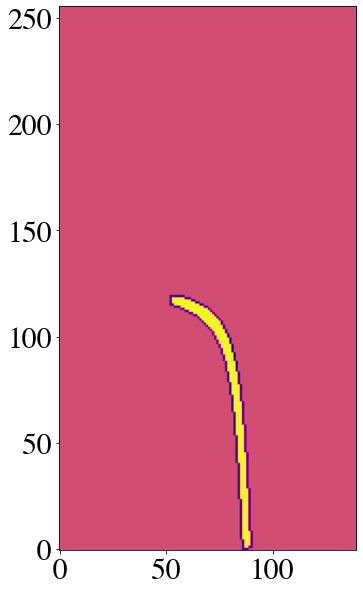

In [13]:
a = imgcurves_2d(4, 90, 2)
b = imgcurves_2d(4.3, 90, 2)
a_prime = a - 0.1*(a*b)*b
plt.figure(figsize=(6,10))
plt.imshow(a_prime,cmap='plasma',origin='lower')
#plt.imshow(a)

In [14]:
# Put all the image curves in an array (these are the full set of vector a's)
# Make a copy of that array
# Call each one with its parameters
# Run the for loop on neighbors, summing up a delta vector 
# At the end of the double for loops, subtract the delta vector from given basis function (tweak it)
# Update the entry in the (copy of the) array 
# Replace the original array with this regularized array


def GS_orthogalization(cross_track, along_track, epsilon):
    cross_track_offset = np.linspace(cross_track-2, cross_track+2,15)
    along_track_offset = np.linspace(along_track-10, along_track+10,10)
    vector_a = imgcurves_2d(cross_track, along_track, 2)
    delta_a_vec = 0 
    for i in range(len(cross_track_offset)-1):
        for j in range(len(along_track_offset)-1):
            #print(i,j)
            #print(cross_track_offset[i], along_track_offset[j])
            if cross_track_offset[i] > -10 and cross_track_offset[i] < 10 and along_track_offset[j] > 0 and along_track_offset[j]< 140:
                vector_b = imgcurves_2d(cross_track_offset[i], along_track_offset[j], 2)
                delta_a_vec += (np.sum(vector_a * vector_b))*vector_b
            
    new_vec = vector_a - epsilon*delta_a_vec
    return new_vec

In [15]:
first_try = GS_orthogalization(-1.11, 138, 0.0001)

KeyboardInterrupt: 

In [ ]:
print(first_try.shape)
plt.figure(figsize=(6,9))
plt.imshow(first_try, origin='lower')
plt.ylabel('Y Pixels'), plt.xlabel('X Pixels')
plt.title('Example of Gram-Schmidt-Inspired \n Regularization of a Basis Function',fontsize=20)
print(first_try[110,:])

# Gram-Schmidt Algorithm

Vector A and Vector B

Intersection of A and B is just (A.B)

(assuming A and B are normalized — in this case that means the images have a sum of 1)

Gram-Schmidt orthogonalization:  A’ = A - (A.B)B

Small-step tweaking toward orthogonal vectors:

A’_(i+1) = A’_(i) - ε (A’_i . B’_i ) B’_i

# Bring in the T-Maps:

--------------------------------------------------
Date: Sat Sep 10 09:33:04 2016
User: pliewer_jpl
Host: pcliewer15mbp.local
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2.1
--------------------------------------------------
Successfully read 9 records of which:
 - 6 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - nsteps [<class 'numpy.int16'>]
 - nskip [<class 'numpy.int16'>]
 - jsteps [<class 'numpy.int16'>]
 - res [<class 'numpy.int16'>]
 - imgcube [<class 'numpy.ndarray'>]
 - rhocube [<class 'numpy.ndarray'>]
--------------------------------------------------
(140, 256, 512)
height of jmap:  256
width of jmap:  140
shape:  (256, 140)


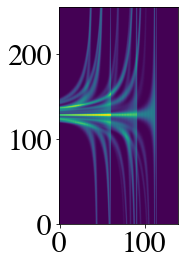

In [16]:
###### Render the jmap

dirname = '/Users/mkenny/Documents/PSP/SyntheticPSPstreamerflythroughmodel20200930080526/CaseAB4Megan/'
sav_fname = pjoin(dirname, 'cubestreamerspporbAB.sav')
sav_data = readsav(sav_fname,verbose='True')
imgcube = sav_data['imgcube']
print(imgcube.shape)

# J-map
lat_arr = imgcube[:,:,400] # For a given longitude (in the middle of the image)
jmap = np.transpose(lat_arr, (1,0))
print("height of jmap: ",jmap.shape[0])
print("width of jmap: ",jmap.shape[1])

plt.imshow(jmap,origin='lower')

print("shape: ",jmap.shape)
#fig1 = plt.imshow([jmap[:,0]],origin='lower',aspect='auto')



Data Type: >f4
Min: , Max:  (0.0, 4.349971e-13)
Min: , Max:  (0.0, 1.0)


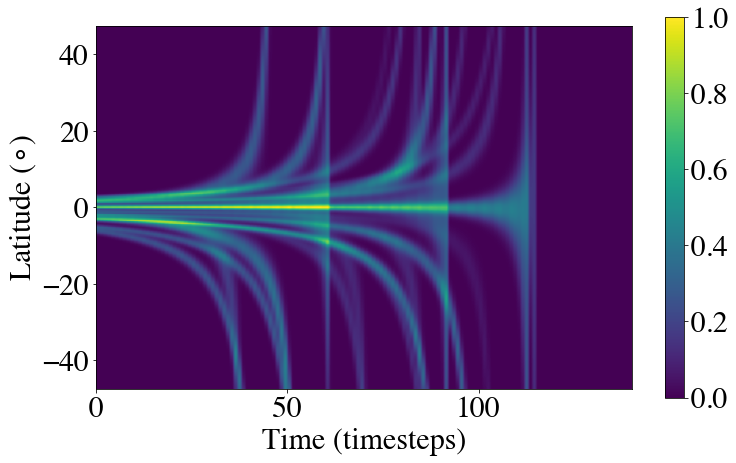

In [17]:
# Normalization post-datacube load

from PIL import Image

print('Data Type: %s' % jmap.dtype)
print('Min: , Max: ', (jmap.min(), jmap.max()))
jmap_cpy = np.copy(jmap)
jmap_cpy /= jmap.max()
# confirm the normalization
print('Min: , Max: ' , (jmap_cpy.min(), jmap_cpy.max()))

fig = plt.figure(figsize=(12,7)) 
plt.imshow(jmap_cpy,extent=(0,140,-95/2.,95/2.))

plt.ylabel('Latitude ($\circ$)')
plt.xlabel('Time (timesteps)')
#plt.title('Lat-map for Static Streamer Model')
ax = plt.colorbar()
fig.savefig('jmap_out.png', bbox_inches='tight', pad_inches=0)

(256, 140)
(256, 140)
4.905222097580151e-12


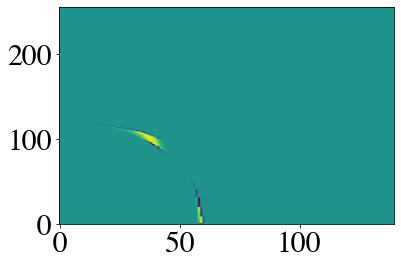

In [18]:
# Let's try multiplying the datasets
print(test.shape)
print(jmap.shape)

image_product_first_try =  jmap*test
plt.imshow((image_product_first_try),origin='lower',aspect='auto')
print(np.sum(image_product_first_try))

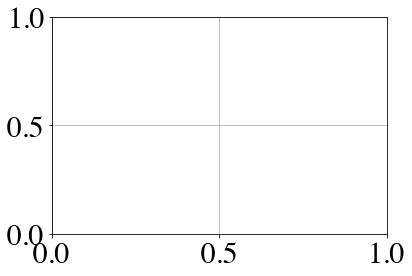

In [19]:
xpix = np.linspace(0,140,140)
ypix = xpix*(256/140)

plt.grid()

In [20]:
test = imgcurves_2d(2.6, 130, 2)
test1 = imgcurves_2d(3, 130, 2)
test2 = imgcurves_2d(-7, 88, 2)

3.723042637940829e-11


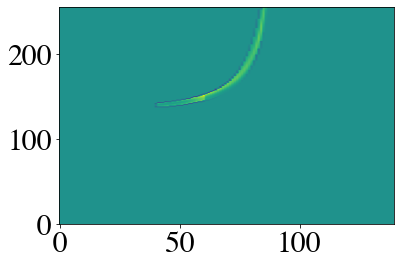

In [21]:
image_product_first_try =  jmap*test2
plt.imshow((image_product_first_try),origin='lower',aspect='auto')
print(np.sum(image_product_first_try))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


"image_product_first_try =  jmap*image_data_2d\nplt.imshow((image_product_first_try),origin='lower',aspect='auto')\nprint(np.sum(image_product_first_try))"

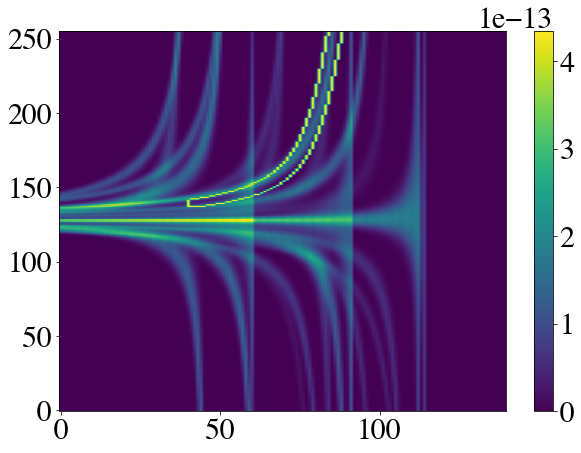

In [22]:
# Let's try multiplying the datasets
import copy
image_data_2d = test2
ysize,xsize = image_data_2d.shape
jmap2 =  copy.copy(jmap)

print(test2*jmap2)

for xstep in range(xsize):
    for ystep in range(ysize):
        if image_data_2d[ystep,xstep] == -1:
            jmap2[ystep,xstep] = np.max(jmap2)
            
plt.figure(figsize=(10,7))
plt.imshow(jmap2,origin='lower',aspect='auto')
plt.colorbar()

'''image_product_first_try =  jmap*image_data_2d
plt.imshow((image_product_first_try),origin='lower',aspect='auto')
print(np.sum(image_product_first_try))'''

In [23]:
'''plt.imshow(jmap2*image_data_2d)
print(image_data_2d[:,10])'''

'plt.imshow(jmap2*image_data_2d)\nprint(image_data_2d[:,10])'

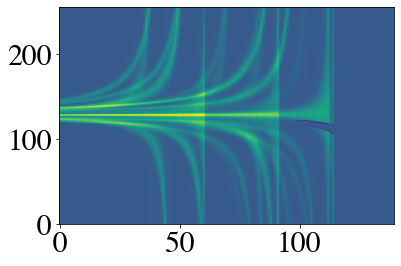

In [24]:


arr = copy.copy(test)
where_0 = np.where(arr == 0)
where_1 = np.where(arr == 1)

arr[where_0] = 1
arr[where_1] = 0



image_product_2nd_try =  jmap*arr
plt.imshow((image_product_2nd_try),origin='lower',aspect='auto')


[ 43  44  58  59  60  76  79  80  83  84  87  88  91  95  96 103 105 106
 112 114]
[ 36  37  38  48  49  50  60  68  69  70  83  84  85  86  91  94  95  96
 102 111 112 114]
[ 36  37  38  43  44  48  49  50  58  59  60  60  68  69  70  76  79  80
  83  83  84  84  85  86  87  88  91  91  94  95  95  96  96 102 103 105
 106 111 112 112 114 114]
[36, 37, 38, 43, 44, 48, 49, 50, 58, 59, 60, 60, 68, 69, 70, 76, 79, 80, 83, 83, 84, 84, 85, 86, 87, 88, 91, 91, 94, 95, 95, 96, 96, 102, 103, 105, 106, 111, 112, 112, 114, 114]


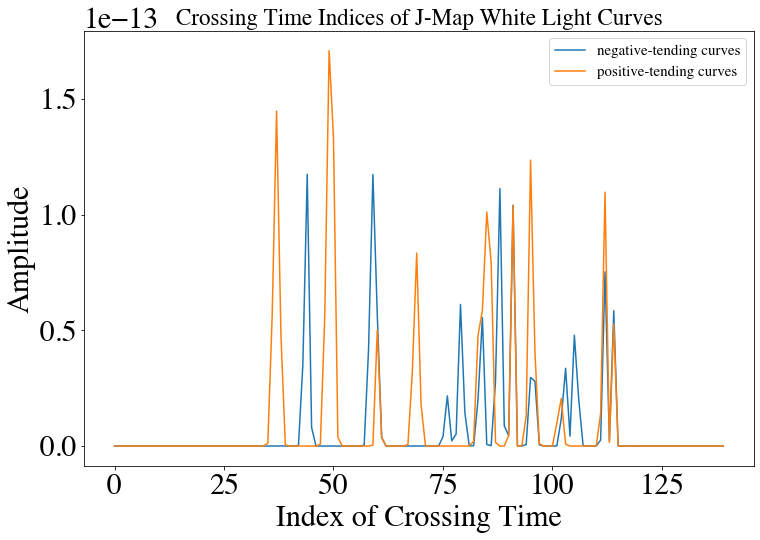

In [25]:
### Determine the indices that correspond to the 

cross_times = []

cross_times.append(np.where(image_product_2nd_try[0,:] > 0.1*np.max(image_product_2nd_try[0,:])))
cross_times.append(np.where(image_product_2nd_try[-1,:] > 0.1*np.max(image_product_2nd_try[0,:])))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(image_product_2nd_try[0,:],label='negative-tending curves')
plt.title("Crossing Time Indices of J-Map White Light Curves",fontsize=23)

plt.plot(image_product_2nd_try[-1,:],label='positive-tending curves')
'''yticks = ['0','0.5','1','1.5','2','2.5','3','3.5']
ax.set_yticklabels(yticks, rotation=0, fontsize=8)
'''
plt.ylabel("Amplitude")
plt.xlabel("Index of Crossing Time")
plt.legend(prop={'size': 15})

print(cross_times[0][0])
print(cross_times[1][0])
combined_times = list(cross_times[0][0]) + list(cross_times[1][0])
combined_times = np.sort(combined_times)
print(combined_times)
combined_times = list(combined_times)

print(combined_times)


In [26]:
'''image_product_third_try = image_product_2nd_try + (image_product_first_try*0.05)
plt.imshow((image_product_third_try),origin='lower',aspect='auto')'''

"image_product_third_try = image_product_2nd_try + (image_product_first_try*0.05)\nplt.imshow((image_product_third_try),origin='lower',aspect='auto')"

In [27]:
### Generate array of image curves

x0_param = np.linspace(0.1,140,140) # along track distance (start at 0.1 to avoid dividing by zero)
h0_param = np.linspace(-10,10,num=100) # cross-track distance
selected_angular_span = 180
image_curves_1 = []

str_len = 0
for x in range(len(x0_param)-1):
    for y in range(len(h0_param)-1):
        print(x0_param[x],h0_param[y])
        image_curves_1.append(imgcurves_2d(h0_param[y], x0_param[x],2))
        
        str_len = trackPercent(x,len(x0_param),str_len)
print(len(image_curves_1))

0.1 -10.0
0.00 % complete0.1 -9.797979797979798
0.00 % complete0.1 -9.595959595959595
0.00 % complete0.1 -9.393939393939394
0.00 % complete0.1 -9.191919191919192
0.00 % complete0.1 -8.98989898989899
0.00 % complete0.1 -8.787878787878787
0.00 % complete0.1 -8.585858585858587
0.00 % complete0.1 -8.383838383838384
0.00 % complete0.1 -8.181818181818182
0.00 % complete0.1 -7.979797979797979
0.00 % complete0.1 -7.777777777777778
0.00 % complete0.1 -7.575757575757576
0.00 % complete0.1 -7.373737373737374
0.00 % complete0.1 -7.171717171717171
0.00 % complete0.1 -6.96969696969697
0.00 % complete0.1 -6.767676767676768
0.00 % complete0.1 -6.565656565656566
0.00 % complete0.1 -6.363636363636363
0.00 % complete0.1 -6.161616161616162
0.00 % complete0.1 -5.959595959595959
0.00 % complete0.1 -5.757575757575758
0.00 % complete0.1 -5.555555555555555
0.00 % complete0.1 -5.353535353535354
0.00 % complete0.1 -5.151515151515151
0.00 % complete0.1 -4.94949494949495
0.00 % complete0.1 -4.747474747474747
0.00 

0.71 % complete1.106474820143885 7.575757575757574
0.71 % complete1.106474820143885 7.777777777777779
0.71 % complete1.106474820143885 7.979797979797979
0.71 % complete1.106474820143885 8.18181818181818
0.71 % complete1.106474820143885 8.383838383838384
0.71 % complete1.106474820143885 8.585858585858585
0.71 % complete1.106474820143885 8.787878787878789
0.71 % complete1.106474820143885 8.98989898989899
0.71 % complete1.106474820143885 9.19191919191919
0.71 % complete1.106474820143885 9.393939393939394
0.71 % complete1.106474820143885 9.595959595959595
0.71 % complete1.106474820143885 9.7979797979798
0.71 % complete2.11294964028777 -10.0
1.43 % complete2.11294964028777 -9.797979797979798
1.43 % complete2.11294964028777 -9.595959595959595
1.43 % complete2.11294964028777 -9.393939393939394
1.43 % complete2.11294964028777 -9.191919191919192
1.43 % complete2.11294964028777 -8.98989898989899
1.43 % complete2.11294964028777 -8.787878787878787
1.43 % complete2.11294964028777 -8.585858585858587

2.14 % complete3.1194244604316546 -0.10101010101010033
2.14 % complete3.1194244604316546 0.10101010101010033
2.14 % complete3.1194244604316546 0.30303030303030276
2.14 % complete3.1194244604316546 0.5050505050505052
2.14 % complete3.1194244604316546 0.7070707070707076
2.14 % complete3.1194244604316546 0.9090909090909083
2.14 % complete3.1194244604316546 1.1111111111111107
2.14 % complete3.1194244604316546 1.3131313131313131
2.14 % complete3.1194244604316546 1.5151515151515156
2.14 % complete3.1194244604316546 1.7171717171717162
2.14 % complete3.1194244604316546 1.9191919191919187
2.14 % complete3.1194244604316546 2.121212121212121
2.14 % complete3.1194244604316546 2.3232323232323235
2.14 % complete3.1194244604316546 2.525252525252524
2.14 % complete3.1194244604316546 2.7272727272727266
2.14 % complete3.1194244604316546 2.929292929292929
2.14 % complete3.1194244604316546 3.1313131313131315
2.14 % complete3.1194244604316546 3.333333333333334
2.14 % complete3.1194244604316546 3.5353535353

3.57 % complete5.132374100719424 -8.181818181818182
3.57 % complete5.132374100719424 -7.979797979797979
3.57 % complete5.132374100719424 -7.777777777777778
3.57 % complete5.132374100719424 -7.575757575757576
3.57 % complete5.132374100719424 -7.373737373737374
3.57 % complete5.132374100719424 -7.171717171717171
3.57 % complete5.132374100719424 -6.96969696969697
3.57 % complete5.132374100719424 -6.767676767676768
3.57 % complete5.132374100719424 -6.565656565656566
3.57 % complete5.132374100719424 -6.363636363636363
3.57 % complete5.132374100719424 -6.161616161616162
3.57 % complete5.132374100719424 -5.959595959595959
3.57 % complete5.132374100719424 -5.757575757575758
3.57 % complete5.132374100719424 -5.555555555555555
3.57 % complete5.132374100719424 -5.353535353535354
3.57 % complete5.132374100719424 -5.151515151515151
3.57 % complete5.132374100719424 -4.94949494949495
3.57 % complete5.132374100719424 -4.747474747474747
3.57 % complete5.132374100719424 -4.545454545454546
3.57 % complet

4.29 % complete6.138848920863309 3.737373737373737
4.29 % complete6.138848920863309 3.9393939393939394
4.29 % complete6.138848920863309 4.141414141414142
4.29 % complete6.138848920863309 4.3434343434343425
4.29 % complete6.138848920863309 4.545454545454545
4.29 % complete6.138848920863309 4.747474747474747
4.29 % complete6.138848920863309 4.94949494949495
4.29 % complete6.138848920863309 5.1515151515151505
4.29 % complete6.138848920863309 5.353535353535353
4.29 % complete6.138848920863309 5.555555555555555
4.29 % complete6.138848920863309 5.757575757575758
4.29 % complete6.138848920863309 5.9595959595959584
4.29 % complete6.138848920863309 6.161616161616163
4.29 % complete6.138848920863309 6.363636363636363
4.29 % complete6.138848920863309 6.565656565656564
4.29 % complete6.138848920863309 6.767676767676768
4.29 % complete6.138848920863309 6.969696969696969
4.29 % complete6.138848920863309 7.171717171717173
4.29 % complete6.138848920863309 7.373737373737374
4.29 % complete6.13884892086

KeyboardInterrupt: 

In [258]:
all_image_curves_array = np.array(image_curves)
print(all_image_curves_array.shape)
### Not all basis functions are properly generated (e.g. index 1091)

(13761, 256, 140)


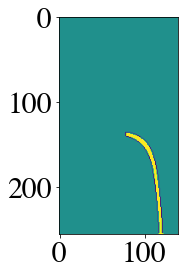

In [261]:
plt.imshow(all_image_curves_array[12000])

In [43]:
### Apply Graham-Schmidt-like regularization
x0_param = np.linspace(0.1,140,140) # along track distance (start at 0.1 to avoid dividing by zero)
h0_param = np.linspace(-10,10,num=100) # cross-track distance
GS_BF_set = [] # initialize list

str_len = 0
for x in range(len(x0_param)-1):
    for y in range(len(h0_param)-1): # run through parameter space
        epsilon = 0.001 # define epsilon
        GS_vector = GS_orthogalization(h0_param[y], x0_param[x], epsilon) # call function to tweak original BF
        GS_BF_set.append(GS_vector) # add result to list
        str_len = trackPercent(x,len(x0_param),str_len)

GS_BF_set = np.array(GS_BF_set)  # turn list into array

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % complete0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.00 % co

1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246


3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244


IndexError: index 5000 is out of bounds for axis 0 with size 5000

In [44]:
print(len(x0_param),len(h0_param))

140 100


In [625]:
'''
Here I compute the inner product of the image (of the analytic curve) and the jmap and fill each pixel
of the output image- the tomogram- with the inner product that corresponds to the the unique parameter pair
''' 

x0_param = np.linspace(0.1,140,140) # along track distance (start at 0.1 to avoid dividing by zero)
h0_param = np.linspace(-12,12,num=100) # cross-track distance
tomogram_array = np.zeros((len(h0_param),len(x0_param)))
selected_angular_span = 180

str_len = 0
for x in range(len(x0_param)-1):
    for y in range(len(h0_param)-1):
        #print(x,y,x0_param[x],h0_param[y])
        # reset sum each each we eval a new combination of x0, h0
        x0_h0_pixel_sum = 0 
        
        # make an output image (the tomogram) to fill
           # This output image doesn't have to be the same size as the jmap and image curve
              # The sizes of the parameter arrays determine the size of the tomogram
                        
        #  
        '''epsilon = 0.001 # define epsilon
        GS_vector = GS_orthogalization(h0_param[y], x0_param[x], epsilon) # call function to tweak original BF
'''
        image_curve_2d = imgcurves_2d(h0_param[y], x0_param[x],3)
        
        img_jmap_product = jmap*image_curve_2d
        x0_h0_pixel_sum = np.sum(img_jmap_product)
        
        
        # Once done looping through pixels in jmap and image curve image, fill the tomogram pixel w/ porduct-integral
        #print(type(running_sum))
        
        #print("x, y, x0[x], h0[y],running sum: ",x,y,x,h0_param[y],x0_h0_pixel_sum)
        
        tomogram_array[y,x] = x0_h0_pixel_sum
        
        str_len = trackPercent(x,len(x0_param),str_len)
      

98.57 % complete        

(100, 140)


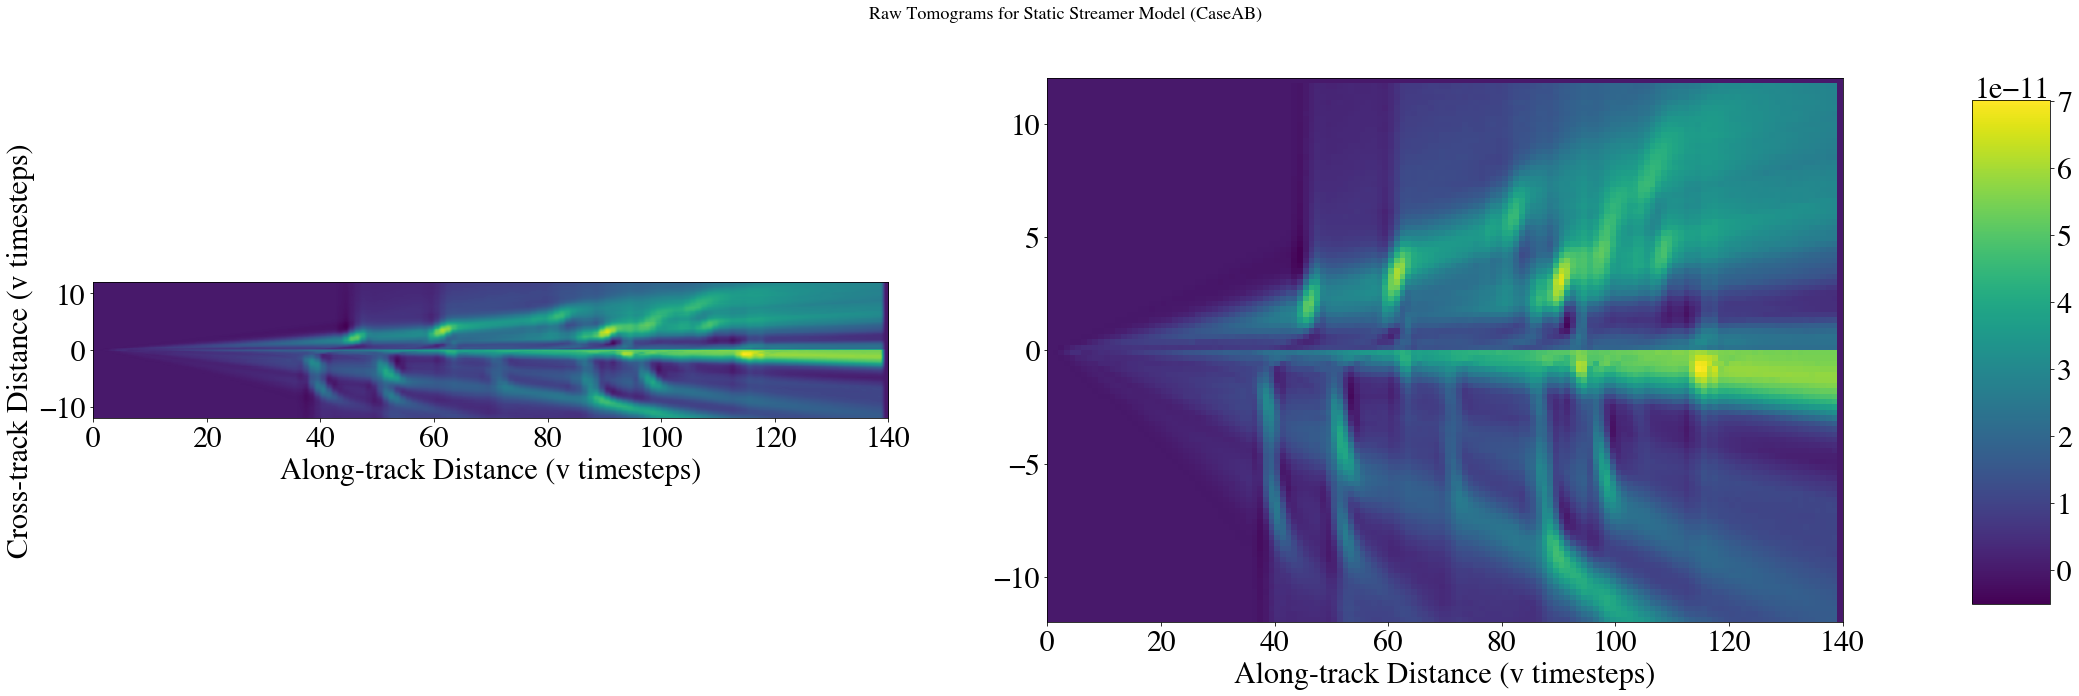

In [553]:
print(tomogram_array.shape)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(36,10))
ax1.imshow(tomogram_array,origin='lower',extent=(0,140,h0_param[0],h0_param[-1],))
zoomed_in = ax2.imshow(tomogram_array,origin='lower',aspect='auto',extent=(0,140,h0_param[0],h0_param[-1],))


ax1.set_xlabel('Along-track Distance (v timesteps)')
ax2.set_xlabel('Along-track Distance (v timesteps)')

ax1.set_ylabel('Cross-track Distance (v timesteps)')
fig.suptitle('Raw Tomograms for Static Streamer Model (CaseAB)',fontsize=18)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(zoomed_in,cax=cbar_ax)

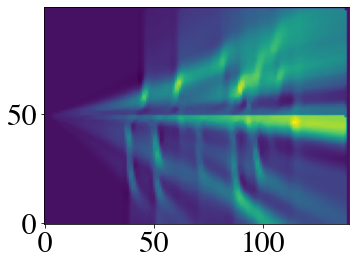

In [564]:
import cv2
img = tomogram_array.astype('float32')

median_blur_uniform_cadence = cv2.medianBlur(img, 3)
plt.imshow((median_blur_uniform_cadence), origin='lower',cmap='viridis')

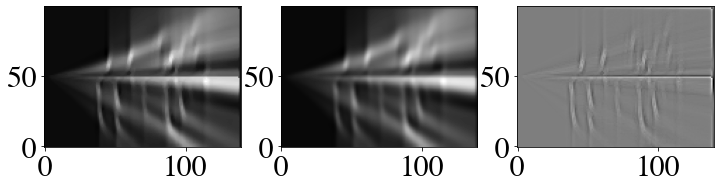

In [571]:
import scipy
from scipy import misc
from scipy.ndimage import gaussian_filter

fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3,figsize=(12,8))
plt.gray()
ax1.imshow((median_blur_uniform_cadence), origin='lower')

gaussian_kernel = gaussian_filter(median_blur_uniform_cadence, sigma=1)
ax2.imshow(gaussian_kernel, origin='lower')

kernel_subtracted = median_blur_uniform_cadence - gaussian_kernel
ax3.imshow(kernel_subtracted, origin='lower')

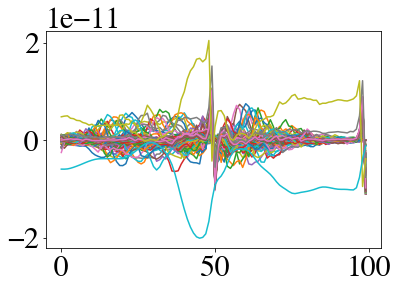

In [592]:
plt.plot(kernel_subtracted)

In [623]:
orig_image = copy.copy(median_blur_uniform_cadence)

new_image = copy.copy(median_blur_uniform_cadence)
average_sum = 0; n = 0; count = 0
for y in range(orig_image.shape[0]):
    for x in range(orig_image.shape[1]):
        
        if np.abs(kernel_subtracted[y,x]) >= 1e-11:
            count += 1
            for yoffset in range(-7,8):
                for xoffset in range(-7,8):
                    if (orig_image.shape[1] > (x + xoffset) >= 0) and (orig_image.shape[0] > (y + yoffset) >= 0):
                        average_sum += orig_image[y+yoffset][x+xoffset]
                        n += 1

            new_image[y,x] = average_sum/n
            average_sum = 0
            n = 0



68


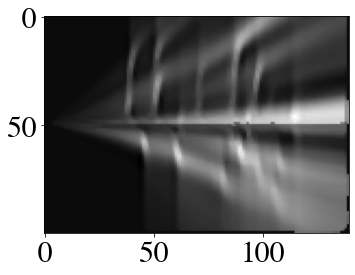

In [624]:
print(count)
plt.imshow(new_image)

# Previous tomogram below--diagonal rays from bright spots are strong/obvious

In [408]:
tomo = np.copy(tomogram_array)
tomo = 100*tomo/np.max(tomo)
dx = 30; dy = 30

#output = np.zeros((inner_FOV_images,1024,960,2*dy+1,2*dx+1)) # Initialize output array
S2 = np.ones((100-2*dy, 140-2*dx, 2*dy+1, 2*dx+1))
print(S2.shape, tomo.shape[1]+1-2*dx)


# results = [(i, j)
#            for i in range(10)
#            for j in range(i)]
S2 = []
S2 = [(tomo[y,x] - tomo[y + dy_value, x + dx_value])**2
     for y in range(dy, tomo.shape[0] - dy)
     for x in range(dx, tomo.shape[1] - dx)
     for dy_value in range(-dy, dy+1, 1)
     for dx_value in range(-dx, dx+1, 1)]


'''for y in range(dy, tomo.shape[0] - dy): # step through y pixels, shrunk by dy on each end

    for x in range(dx, tomo.shape[1] - dx): # step through x pixels, shrunk by dx on each end

        for dy_value in range(-dy, dy+1, 1):  # step through y lags 
            
            for dx_value in range(-dx, dx+1, 1):  # step through x lags
                #print("x, y, dx, dy, x+dx, y+dy: ",x,y,dx_index, dy_index,x+dx_index, y+dy_index)

#                 print(dy_value, dx_value)
                ## Compute S2, where we square the difference between the image and the shifted image

                S2[y-dy,x-dx,dy_value+dy,dx_value+dx] = (tomo[y,x] - tomo[y + dy_value, x + dx_value])**2
                
#                 if dx_value == 0 and dy_value == 0:
#                     print(x, y, dx_value, dy_value, S2[y-2*dy,x-2*dx,dy_value,dx_value])
                    
                    #print("x = %d, y = %d, x + dx = %d, y+dy = %d"%(x, y, x + dx_value ,y + dy_value, ))
                    '''

(40, 80, 61, 61) 81


'for y in range(dy, tomo.shape[0] - dy): # step through y pixels, shrunk by dy on each end\n\n    for x in range(dx, tomo.shape[1] - dx): # step through x pixels, shrunk by dx on each end\n\n        for dy_value in range(-dy, dy+1, 1):  # step through y lags \n            \n            for dx_value in range(-dx, dx+1, 1):  # step through x lags\n                #print("x, y, dx, dy, x+dx, y+dy: ",x,y,dx_index, dy_index,x+dx_index, y+dy_index)\n\n#                 print(dy_value, dx_value)\n                ## Compute S2, where we square the difference between the image and the shifted image\n\n                S2[y-dy,x-dx,dy_value+dy,dx_value+dx] = (tomo[y,x] - tomo[y + dy_value, x + dx_value])**2\n                \n#                 if dx_value == 0 and dy_value == 0:\n#                     print(x, y, dx_value, dy_value, S2[y-2*dy,x-2*dx,dy_value,dx_value])\n                    \n                    #print("x = %d, y = %d, x + dx = %d, y+dy = %d"%(x, y, x + dx_value ,y + dy_value, ))\

In [412]:
tomo = np.copy(tomogram_array)
tomo = 100*tomo/np.max(tomo)
dx = 30; dy = 30

#output = np.zeros((inner_FOV_images,1024,960,2*dy+1,2*dx+1)) # Initialize output array
S2 = np.ones((100-2*dy, 140-2*dx, 2*dy+1, 2*dx+1))
print(S2.shape, tomo.shape[1]+1-2*dx)

for y in range(dy, tomo.shape[0] - dy): # step through y pixels, shrunk by dy on each end

    for x in range(dx, tomo.shape[1] - dx): # step through x pixels, shrunk by dx on each end

        for dy_value in range(-dy, dy+1, 1):  # step through y lags 
            
            for dx_value in range(-dx, dx+1, 1):  # step through x lags
                #print("x, y, dx, dy, x+dx, y+dy: ",x,y,dx_index, dy_index,x+dx_index, y+dy_index)

#                 print(dy_value, dx_value)
                ## Compute S2, where we square the difference between the image and the shifted image

                S2[y-dy,x-dx,dy_value+dy,dx_value+dx] = (tomo[y,x] - tomo[y + dy_value, x + dx_value])**2
                
#                 if dx_value == 0 and dy_value == 0:
#                     print(x, y, dx_value, dy_value, S2[y-2*dy,x-2*dx,dy_value,dx_value])
                    
                    #print("x = %d, y = %d, x + dx = %d, y+dy = %d"%(x, y, x + dx_value ,y + dy_value, ))
                    

(40, 80, 61, 61) 81


In [411]:
print(np.array(S2).shape)

(11907200,)


(40, 80, 61, 61)
(61, 61)


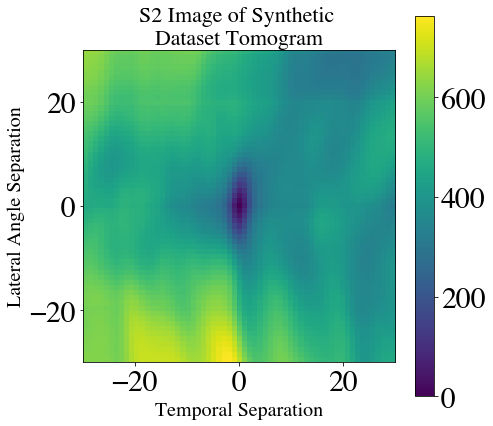

In [414]:
output = np.array(S2)
print(output.shape)
# mean_im = np.mean(output[:-dy-1,:-dx-1,:,:],axis=(0,1))
mean_im = np.mean(output,axis=(0,1))
plt.figure(figsize=(7,7))
plt.imshow(mean_im,origin='lower',extent=(-dx,dx,-dy,dy))
plt.colorbar()

plt.xlabel("Temporal Separation",fontsize=20)
plt.ylabel("Lateral Angle Separation",fontsize=20)
plt.title("S2 Image of Synthetic \nDataset Tomogram",fontsize=22)
 
print(mean_im.shape)

<ipython-input-369-fe77e36a4c38>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


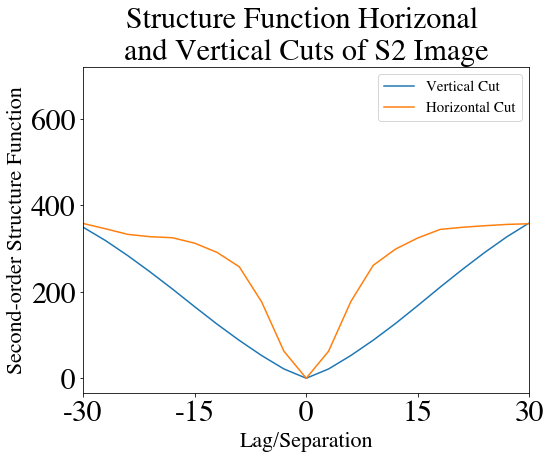

In [369]:
#plt.plot(np.mean(mean_im, axis=1))
#plt.plot(np.mean(mean_im, axis=0))
fig,ax = plt.subplots(figsize=(8,6))

# plt.hlines(380,0,2*dx+1,color='red',linestyle='--')
# plt.hlines(366, 0,2*dx+1,color='red',linestyle='--')
ax.plot(mean_im[:,dx], label='Vertical Cut')
ax.plot(mean_im[dy,:],label='Horizontal Cut')
ax.set_xlabel("Lag/Separation",fontsize=22)
ax.set_ylabel("Second-order Structure Function",fontsize=22)
ax.set_title("Structure Function Horizonal \nand Vertical Cuts of S2 Image",fontsize=30)
fig.canvas.draw()

labels = ['-30','-15','0','15','30']
ax.set_xticklabels(labels) 

plt.xlim(20,40)
plt.legend(fontsize=15)

(90, 130, 11, 11)
307.697444152871


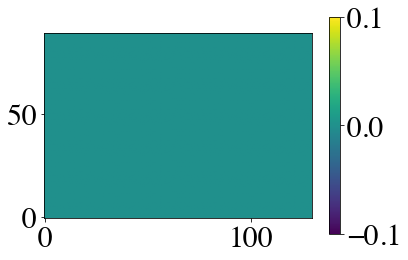

In [286]:
# plt.imshow(output[:-dy-1,:-dx-1,0,0],origin='lower')
plt.imshow(output[:,:,dy,dx],origin='lower')
plt.colorbar()
print(output.shape)
print(np.mean(output[:-dy-1,:-dx-1,0,0]))

new_arr = []
for i in range(2*dy+1):
    for j in range(2*dx+1):
        diff_i = dy - i
        #print(i, diff_i)
        #new_arr.append(output[:,:,i+,j])

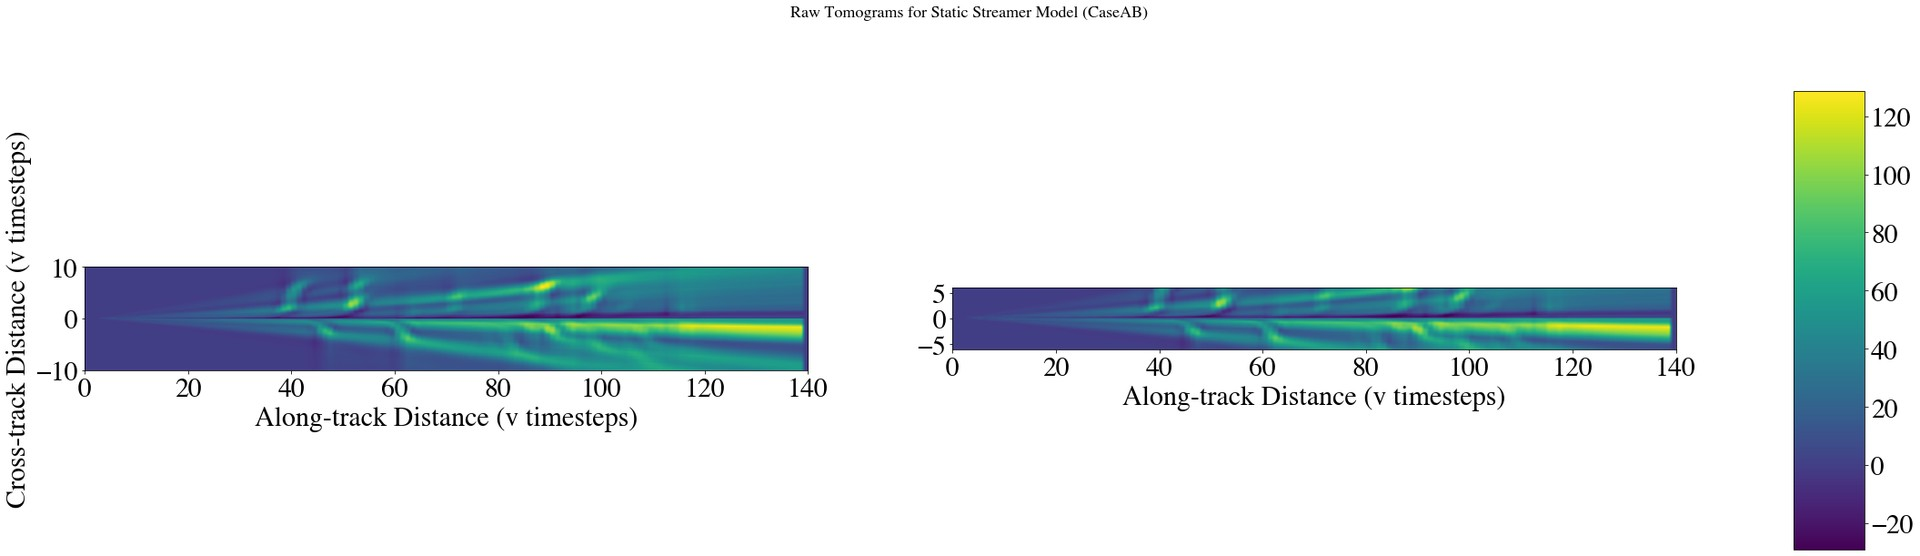

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(tomogram_array,origin='lower',extent=(0,140,h0_param[0],h0_param[-1],))


In [ ]:
tomogram_pixel_sum = np.sum(tomogram_array)
print(tomogram_pixel_sum)
sub_mean= tomogram_array - np.mean(tomogram_array)
plt.imshow(sub_mean,origin='lower',aspect='auto',extent=(0,140,h0_param[0],h0_param[-1],))



In [ ]:
# Extra code to keep around just in case...
      
                
                        
                '''if x > 0 and yposPlot < ImageYdim and ypos != ycoord_old and xpos != xcoord_old:
                    print(ypos, xpos, ycoord_old, xcoord_old)
                    xindices.append(xpos)
                    yindices.append(ypos)
                    local_deriv = (ypos - ycoord_old)/(xpos - xcoord_old)
                    print(local_deriv)
                    if xpos > xindices[0]:
                        print(xpos,xindices)
                        xposPlot = xpos + j - int(HalfLineWidth)
                        image_data_2d[-yposPlot,xposPlot] = 1'''
                
                # Immediate neighborhood
                '''if yposPlot_plus + HalfLineWidth < ImageYdim and yposPlot_minus > 0:
                    if yposPlot - HalfLineWidth >= 0:
                        if yposPlot_plus <= yposPlot_plus + HalfLineWidth:
                            if yposPlot_minus >= yposPlot_minus - HalfLineWidth:
                                image_data_2d[-(yposPlot_plus + int(HalfLineWidth)), xpos] = 0
                                image_data_2d[-(yposPlot_plus - int(HalfLineWidth)), xpos] = 0
                '''                
                        

                    
### 2-pixel negative band
            # never need these
                '''elif image_data_2d[ystep,xstep+2] == 0:
                    image_data_2d[ystep,xstep] = -1
                elif image_data_2d[ystep+2,xstep] == 0:
                    image_data_2d[ystep,xstep] = -1    
                elif image_data_2d[ystep-2,xstep] == 0:
                    image_data_2d[ystep,xstep] = -1
                elif image_data_2d[ystep,xstep-2] == 0:
                    if not image_data_2d[ystep,0]:
                        image_data_2d[ystep,xstep] = -1'''   